### Simple Conv Net

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape= (150, 150, 3)))
model.add(layers.MaxPooling2D ((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D ((2,2)))
model.add(layers.Conv2D ( 128, (3,3), activation='relu' ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D( 128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [9]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer= optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])


### Preprocessing

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'D:/dataset/dog_vs_cat/dataset_new/train/'
validation_dir = 'D:/dataset/dog_vs_cat/dataset_new/validation/'

train_datagen = ImageDataGenerator (rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                 target_size = (150, 150),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=20,
                                                       class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print ('data batch shape ', data_batch.shape)
    print ('labels batch shape ', labels_batch.shape)
    break;

data batch shape  (20, 150, 150, 3)
labels batch shape  (20,)


In [16]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                             epochs=30,
                             validation_data = validation_generator,
                             validation_steps = 50)

model.save('cats_dog_model.h5')

Epoch 1/15
100/100 [==============================] - 37s 372ms/step - loss: 0.6850 - acc: 0.5440 - val_loss: 0.6624 - val_acc: 0.6300
Epoch 2/15
100/100 [==============================] - 14s 138ms/step - loss: 0.6521 - acc: 0.6150 - val_loss: 0.6364 - val_acc: 0.6470
Epoch 3/15
100/100 [==============================] - 14s 139ms/step - loss: 0.6117 - acc: 0.6740 - val_loss: 0.6251 - val_acc: 0.6470
Epoch 4/15
100/100 [==============================] - 14s 142ms/step - loss: 0.5669 - acc: 0.7045 - val_loss: 0.6115 - val_acc: 0.6600
Epoch 5/15
100/100 [==============================] - 15s 154ms/step - loss: 0.5384 - acc: 0.7415 - val_loss: 0.5621 - val_acc: 0.7130
Epoch 6/15
100/100 [==============================] - 15s 151ms/step - loss: 0.5073 - acc: 0.7430 - val_loss: 0.6015 - val_acc: 0.6730
Epoch 7/15
100/100 [==============================] - 15s 148ms/step - loss: 0.4807 - acc: 0.7600 - val_loss: 0.5778 - val_acc: 0.7030
Epoch 8/15
100/100 [==============================] - 1

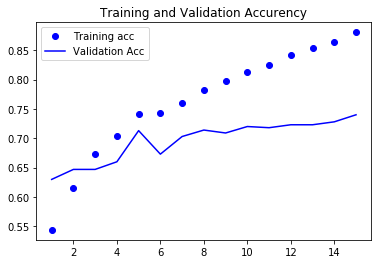

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1 )

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accurency')
plt.legend()

plt.savefig('Training_and_Validation_Accurency.png')


plt.show()